In [251]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib

In [252]:
%run Grid.py 

# Questions

 - can agent gain reward everytime a position is visited ? <br>
 - how to deal with optimal path + collection of rewards? <br>
 - how to incentivize agent to reach the end if rewards can be repeated? <br>
 - how do we measure performance? Is it based on how long it takes to converge?

# Define States and Actions

In [253]:
S = list(range(0,36))
print(S)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


In [254]:
A = list(range(0,36))
print(A)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


### Define legal moves
Agent must move to an adjacent location during each turn. It cannot decide to stay in the same location.

In [255]:
possible_actions = []

for row in range(0,6):
    for col in range(0, 6):
        current = row * 6 + col

        if col > 0:
            left = current - 1
            possible_actions.append((current, left))
        if col < 5:
            right = current + 1
            possible_actions.append((current, right))
        if row > 0:
            up = current - 6
            possible_actions.append((current, up))
        if row < 5:
            down = current + 6
            possible_actions.append((current, down))

print("# possible moves:", len(possible_actions))            
print(possible_actions)

# possible moves: 120
[(0, 1), (0, 6), (1, 0), (1, 2), (1, 7), (2, 1), (2, 3), (2, 8), (3, 2), (3, 4), (3, 9), (4, 3), (4, 5), (4, 10), (5, 4), (5, 11), (6, 7), (6, 0), (6, 12), (7, 6), (7, 8), (7, 1), (7, 13), (8, 7), (8, 9), (8, 2), (8, 14), (9, 8), (9, 10), (9, 3), (9, 15), (10, 9), (10, 11), (10, 4), (10, 16), (11, 10), (11, 5), (11, 17), (12, 13), (12, 6), (12, 18), (13, 12), (13, 14), (13, 7), (13, 19), (14, 13), (14, 15), (14, 8), (14, 20), (15, 14), (15, 16), (15, 9), (15, 21), (16, 15), (16, 17), (16, 10), (16, 22), (17, 16), (17, 11), (17, 23), (18, 19), (18, 12), (18, 24), (19, 18), (19, 20), (19, 13), (19, 25), (20, 19), (20, 21), (20, 14), (20, 26), (21, 20), (21, 22), (21, 15), (21, 27), (22, 21), (22, 23), (22, 16), (22, 28), (23, 22), (23, 17), (23, 29), (24, 25), (24, 18), (24, 30), (25, 24), (25, 26), (25, 19), (25, 31), (26, 25), (26, 27), (26, 20), (26, 32), (27, 26), (27, 28), (27, 21), (27, 33), (28, 27), (28, 29), (28, 22), (28, 34), (29, 28), (29, 23), (29, 35),

In [256]:
walls = [(3,4), (3,9), (4,5), (11,17), (17,23), (12,18), (18,24), (30,31), (27,33), (29,35)]

illegal_moves = [] 

for wall in walls:
    illegal_moves.append((wall[0], wall[1]))
    illegal_moves.append((wall[1], wall[0]))
    
print("# illegal moves:", len(illegal_moves))
print(illegal_moves)

# illegal moves: 20
[(3, 4), (4, 3), (3, 9), (9, 3), (4, 5), (5, 4), (11, 17), (17, 11), (17, 23), (23, 17), (12, 18), (18, 12), (18, 24), (24, 18), (30, 31), (31, 30), (27, 33), (33, 27), (29, 35), (35, 29)]


In [257]:
for illegal_move in illegal_moves:
    possible_actions.remove(illegal_move)

print("# legal moves:", len(possible_actions))
print(possible_actions)

# legal moves: 100
[(0, 1), (0, 6), (1, 0), (1, 2), (1, 7), (2, 1), (2, 3), (2, 8), (3, 2), (4, 10), (5, 11), (6, 7), (6, 0), (6, 12), (7, 6), (7, 8), (7, 1), (7, 13), (8, 7), (8, 9), (8, 2), (8, 14), (9, 8), (9, 10), (9, 15), (10, 9), (10, 11), (10, 4), (10, 16), (11, 10), (11, 5), (12, 13), (12, 6), (13, 12), (13, 14), (13, 7), (13, 19), (14, 13), (14, 15), (14, 8), (14, 20), (15, 14), (15, 16), (15, 9), (15, 21), (16, 15), (16, 17), (16, 10), (16, 22), (17, 16), (18, 19), (19, 18), (19, 20), (19, 13), (19, 25), (20, 19), (20, 21), (20, 14), (20, 26), (21, 20), (21, 22), (21, 15), (21, 27), (22, 21), (22, 23), (22, 16), (22, 28), (23, 22), (23, 29), (24, 25), (24, 30), (25, 24), (25, 26), (25, 19), (25, 31), (26, 25), (26, 27), (26, 20), (26, 32), (27, 26), (27, 28), (27, 21), (28, 27), (28, 29), (28, 22), (28, 34), (29, 28), (29, 23), (30, 24), (31, 32), (31, 25), (32, 31), (32, 33), (32, 26), (33, 32), (33, 34), (34, 33), (34, 35), (34, 28), (35, 34)]


# Define Rewards Matrix

In [258]:
R = np.empty((len(A), len(S)))
R[:] = np.nan
print(str(R[:1]))

[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]


### Add rewards

In [259]:
default_reward = -1
reward = 30 
reward_loc = [5, 16, 19]
penalty = -5 
penalty_loc = [8, 17, 34] 
dst_reward = 100 
dst = 35
highlight_cells = [] 

for action in possible_actions:    
    if action[1] in reward_loc: # Rewards
        R[action[0], action[1]] = reward
        highlight_cells.append(action)
    elif action[1] in penalty_loc: # Penalties
        R[action[0], action[1]] = penalty 
        highlight_cells.append(action) 
    elif action[1] == dst:  #destination
        R[action[0], action[1]] = dst_reward
        highlight_cells.append(action)
    else:
        R[action[0], action[1]] = default_reward
        
def reset_rewards():
    R = np.empty((len(A), len(S)))
    R[:] = np.nan
    
    default_reward = -1 
    reward = 30 
    reward_loc = [5, 16, 19]
    penalty = -5 
    penalty_loc = [8, 17, 34] 
    dst_reward = 100 
    dst = 35
    highlight_cells = [] 

    for action in possible_actions:    
        if action[1] in reward_loc: # Rewards
            R[action[0], action[1]] = reward
            highlight_cells.append(action)
        elif action[1] in penalty_loc: # Penalties
            R[action[0], action[1]] = penalty 
            highlight_cells.append(action) 
        elif action[1] == dst:  #destination
            R[action[0], action[1]] = dst_reward
            highlight_cells.append(action)
        else:
            R[action[0], action[1]] = default_reward
    
    return R
            
R = reset_rewards()

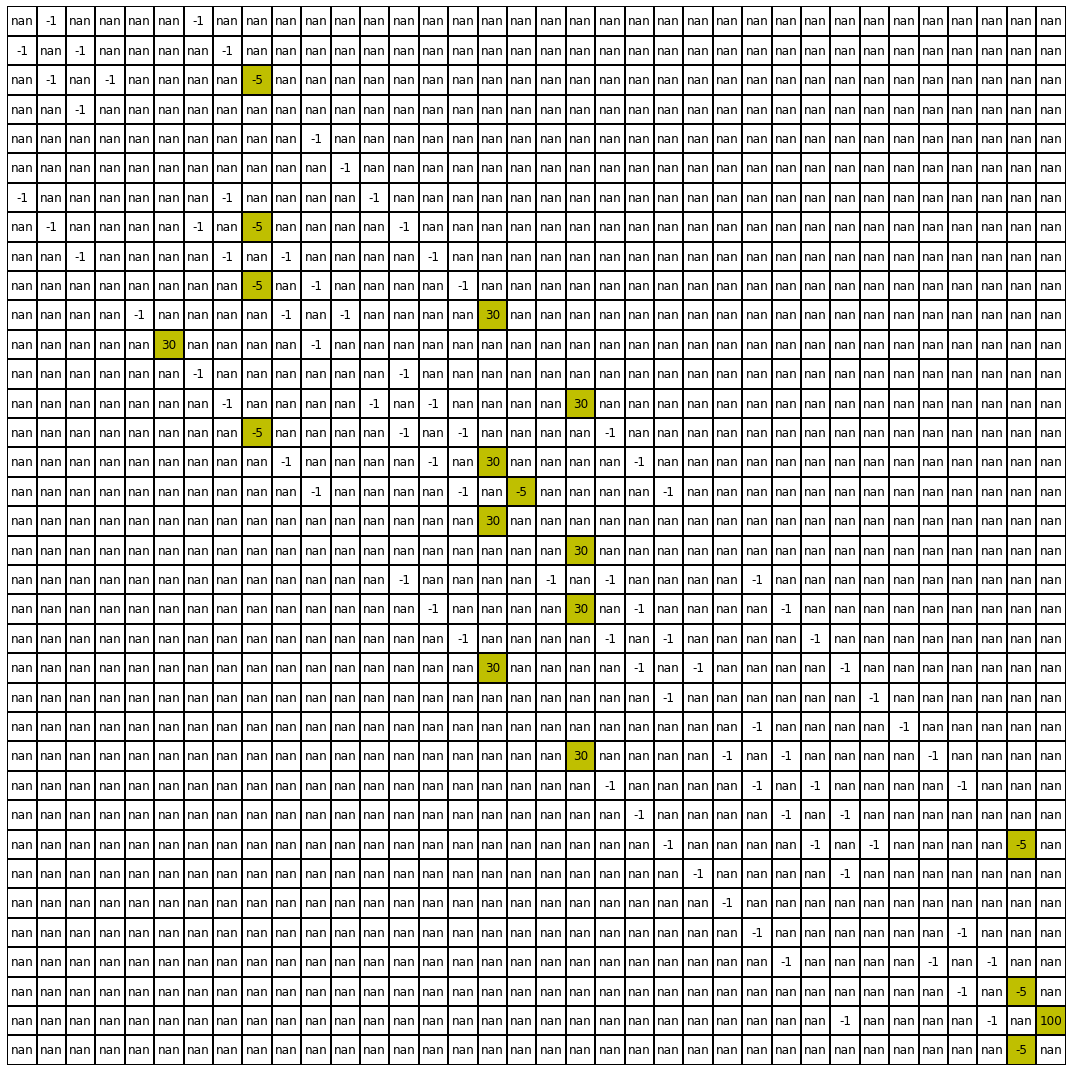

In [260]:
# Print R matrix
plt.rcParams["figure.figsize"] = (15, 15)
Rmatrix = Grid(36, 36, R)
#myBoard.drawGrid()
Rmatrix.drawPath(highlight_cells)

##check this later 
################################
##  0----------------------->35
##  |
##  |
##  |  
##  |
##  |
## 35
################################


# Define Q Matrix


# Running Q learning algorithm 

In [261]:
num_of_episodes = 1000
num_of_turns = 5000

Q = np.zeros(R.shape)

# print('Q matrix: \n\n{}'.format(Q))

#Learning params
alpha = 1
gamma = 0.8
epsilon=0.9
rewards_per_episode = []
steps_per_episode = []

for i in range(num_of_episodes):
    # Initialize State
    s = 0
    
    total_reward = 0
    R = reset_rewards()

    for turn in range(num_of_turns):
        available_actions = np.where(~np.isnan(R[s]))[0]
        q_values = [Q[s,a] for a in available_actions]

        best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
        best_actions_q_values = [Q[s,x] for x in best_actions]

        # Epsilon-greedy
        if np.random.uniform() > epsilon:
            # random 
            a = np.random.choice(available_actions)
        else:
            # greedy
            a = np.random.choice(best_actions)

        r = R[s,a]
        # get rid of penalty/reward
        R[s,a] = -1
        total_reward += r
        
        s_old = s
        s = a 

        # Q value updating
        q_updated = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s,:]) - Q[s_old,a])
        Q[s_old,a] = q_updated

        # if ( (i == 0) or (i == num_of_turns-1)): 
            # print('Q matrix updated: \n\n {}'.format(Q.round(0)))

        if S[s] == dst: # Destination Reached
            rewards_per_episode.append(total_reward)
            steps_per_episode.append(turn)
            break

    # if i % 100 == 0:
    #     print(f'Episode #{i}')
    #     print('Q matrix updated: \n\n {}'.format(Q.round(0)))

In [262]:
print('rewards')
print(rewards_per_episode)
print('steps')
print(steps_per_episode)

rewards
[209.0, -2082.0, -20.0, 96.0, 49.0, 103.0, 55.0, 114.0, 94.0, 110.0, 154.0, 118.0, 118.0, 118.0, 116.0, 143.0, 118.0, 118.0, 114.0, 118.0, 116.0, 116.0, 118.0, 112.0, 118.0, 116.0, 118.0, 112.0, 118.0, 116.0, 114.0, 116.0, 116.0, 118.0, 106.0, 118.0, 114.0, 116.0, 118.0, 110.0, 114.0, 118.0, 112.0, 112.0, 114.0, 108.0, 112.0, 116.0, 145.0, 118.0, 116.0, 116.0, 116.0, 143.0, 114.0, 110.0, 118.0, 118.0, 118.0, 116.0, 118.0, 110.0, 118.0, 116.0, 116.0, 116.0, 118.0, 118.0, 118.0, 116.0, 114.0, 118.0, 114.0, 116.0, 118.0, 118.0, 118.0, 110.0, 118.0, 116.0, 118.0, 110.0, 118.0, 118.0, 133.0, 88.0, 108.0, 112.0, 108.0, 131.0, 118.0, 118.0, 118.0, 116.0, 114.0, 116.0, 143.0, 114.0, 118.0, 118.0, 118.0, 116.0, 118.0, 116.0, 118.0, 118.0, 116.0, 118.0, 118.0, 116.0, 118.0, 114.0, 201.0, 139.0, 118.0, 116.0, 118.0, 118.0, 118.0, 118.0, 118.0, 118.0, 118.0, 114.0, 141.0, 118.0, 116.0, 118.0, 116.0, 118.0, 145.0, 118.0, 118.0, 133.0, 114.0, 116.0, 118.0, 118.0, 116.0, 118.0, 118.0, 116.0, 

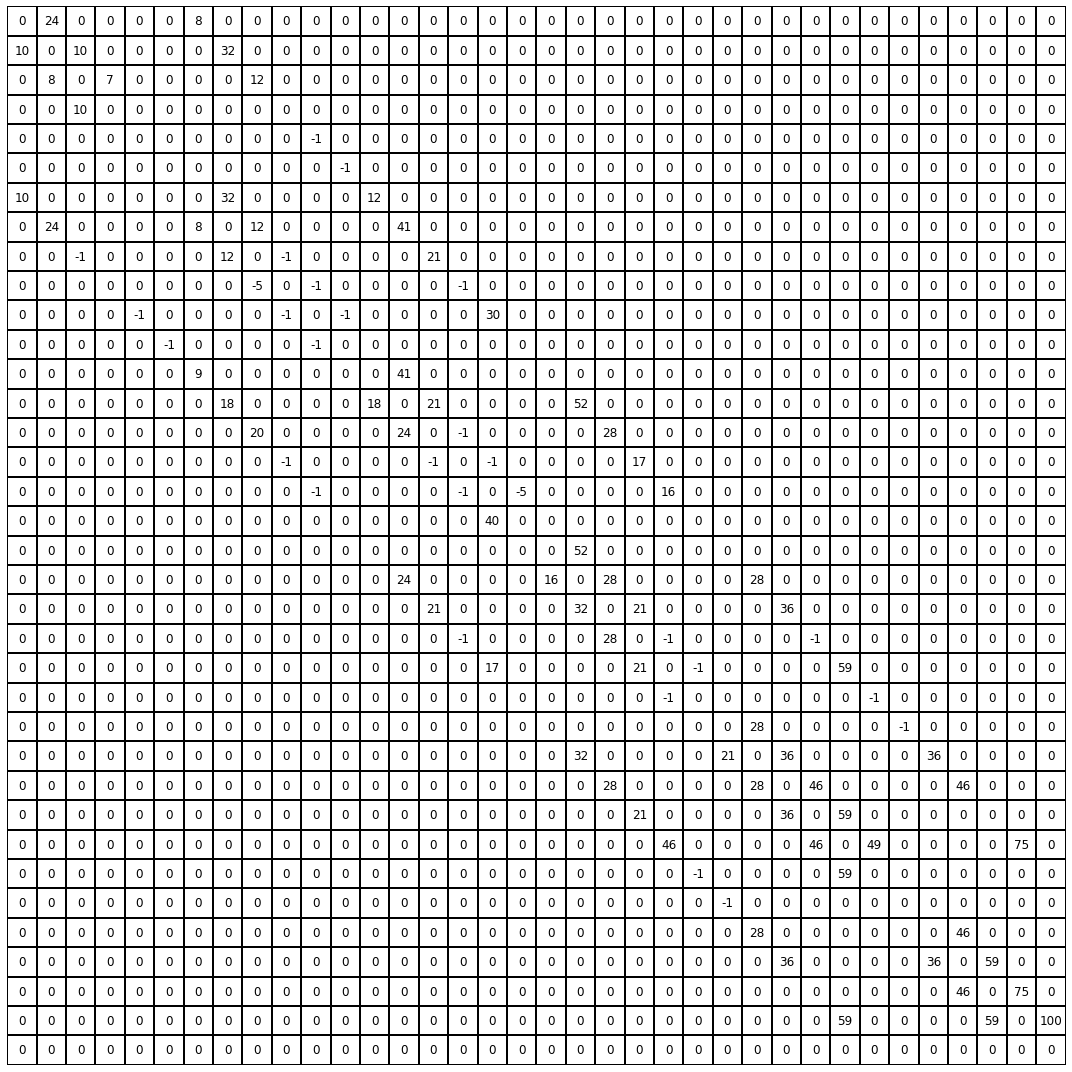

In [263]:
plt.rcParams["figure.figsize"] = (15, 15)
Qmatrix = Grid(36, 36, Q)
Qmatrix.drawGrid()
#Qmatrix.drawPath(highlight_cells)


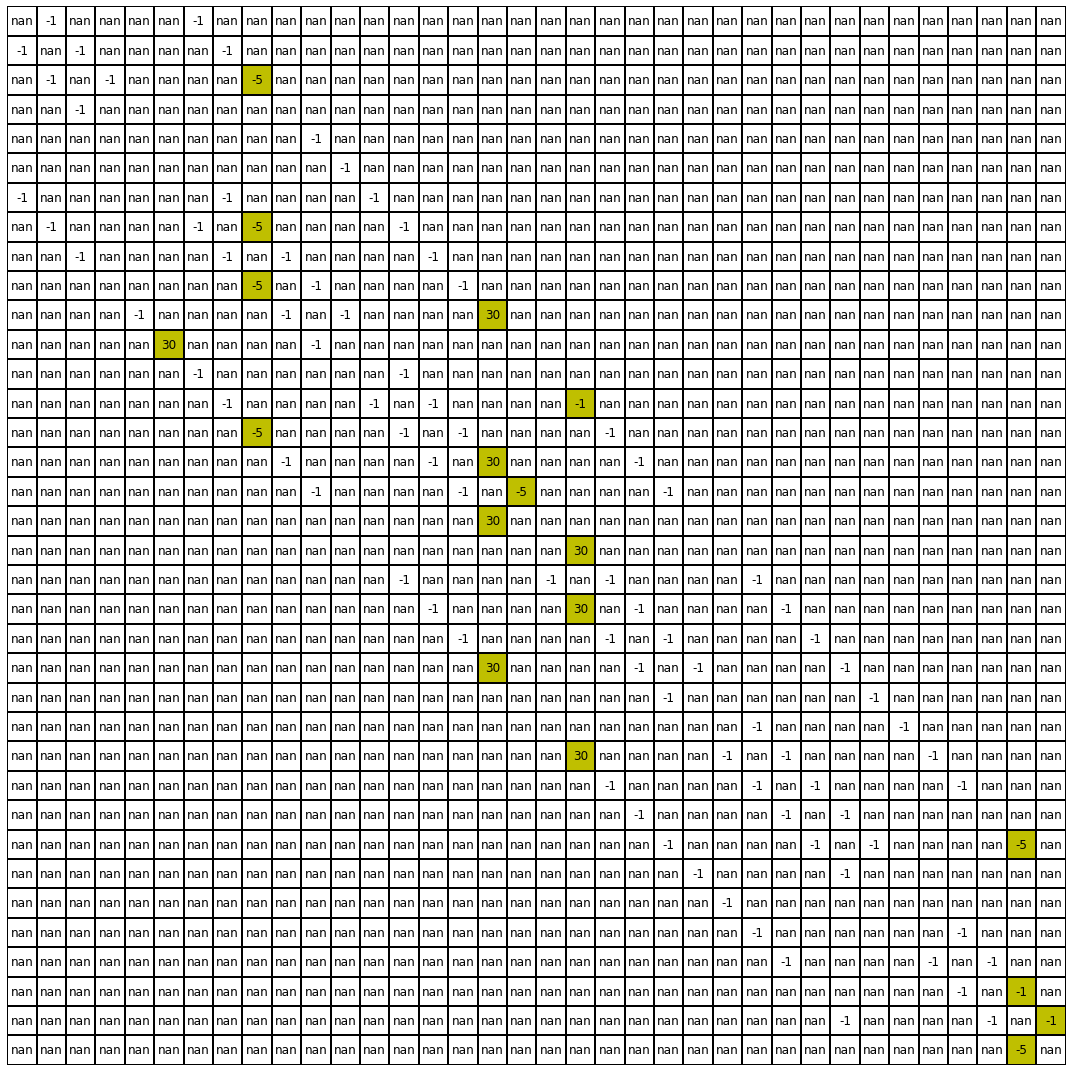

In [264]:
plt.rcParams["figure.figsize"] = (15, 15)
Rmatrix = Grid(36, 36, R)
#Qmatrix.drawGrid()
Rmatrix.drawPath(highlight_cells)
